# Random Forest Classification on Breast Cancer Dataset

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sns.set(style="whitegrid")


## Load Breast Cancer Dataset

In [2]:

cancer = datasets.load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset shape:", X.shape)
print("Classes:", cancer.target_names)
print("Class distribution:", y.value_counts())


Dataset shape: (569, 30)
Classes: ['malignant' 'benign']
Class distribution: 1    357
0    212
Name: count, dtype: int64


## Exploratory Data Analysis

/tmp/ipykernel_10789/228480837.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


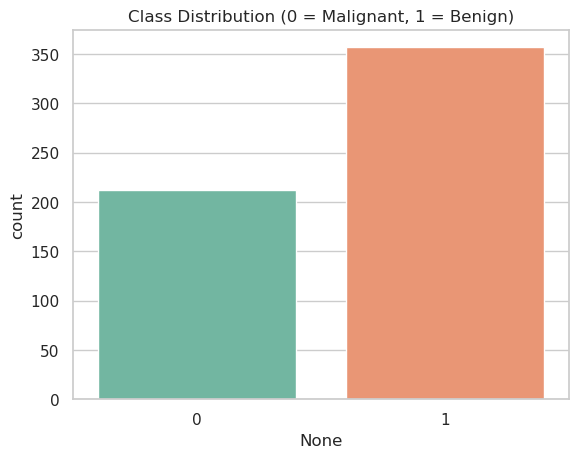

In [3]:

sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


## Train-Test Split

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Train Random Forest Classifier

In [5]:

rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

rf_tuned = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf_tuned.fit(X_train, y_train)

print("Default RF Accuracy:", rf_default.score(X_test, y_test))
print("Tuned RF Accuracy:", rf_tuned.score(X_test, y_test))


Default RF Accuracy: 0.935672514619883
Tuned RF Accuracy: 0.9415204678362573


## Model Evaluation

Classification Report (Tuned RF):
               precision    recall  f1-score   support

   malignant       0.94      0.91      0.92        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



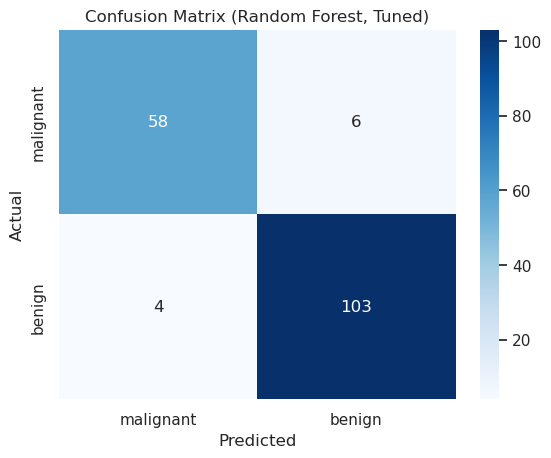

In [6]:

y_pred = rf_tuned.predict(X_test)

print("Classification Report (Tuned RF):\n", classification_report(y_test, y_pred, target_names=cancer.target_names))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title("Confusion Matrix (Random Forest, Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## ROC Curve & AUC

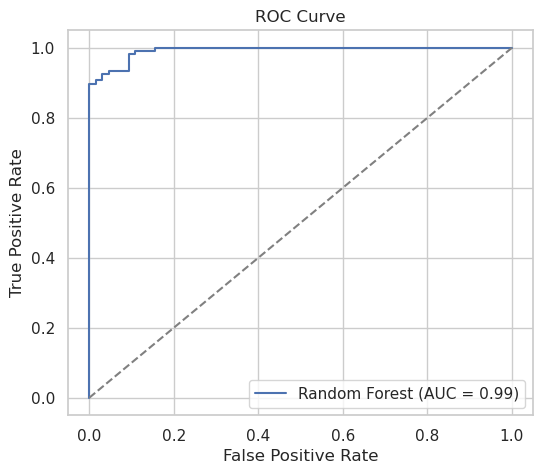

In [7]:

y_prob = rf_tuned.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Actual vs Predicted (Subset Line Plot)

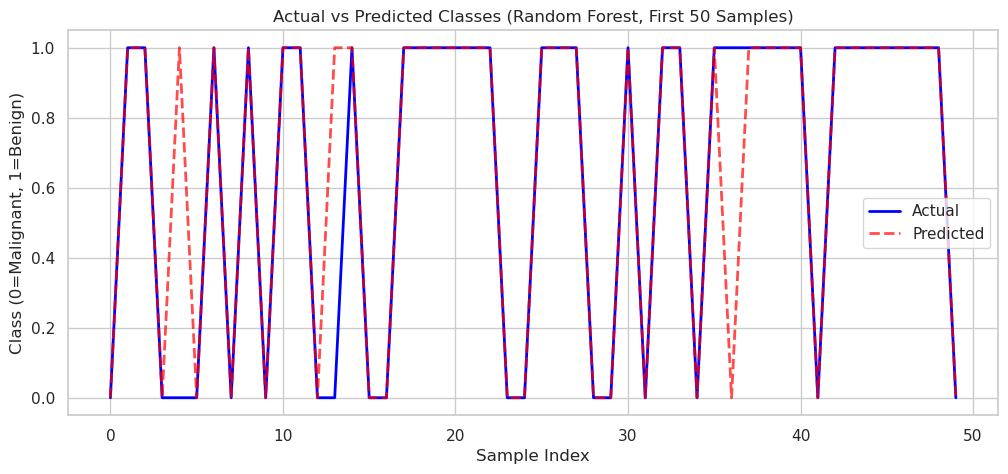

In [8]:

comparison = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred}).reset_index(drop=True)
subset = comparison.iloc[:50]

plt.figure(figsize=(12,5))
plt.plot(subset.index, subset["Actual"], label="Actual", color="blue", linewidth=2)
plt.plot(subset.index, subset["Predicted"], label="Predicted", color="red", linestyle="--", linewidth=2, alpha=0.7)
plt.title("Actual vs Predicted Classes (Random Forest, First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0=Malignant, 1=Benign)")
plt.legend()
plt.show()


## Feature Importance

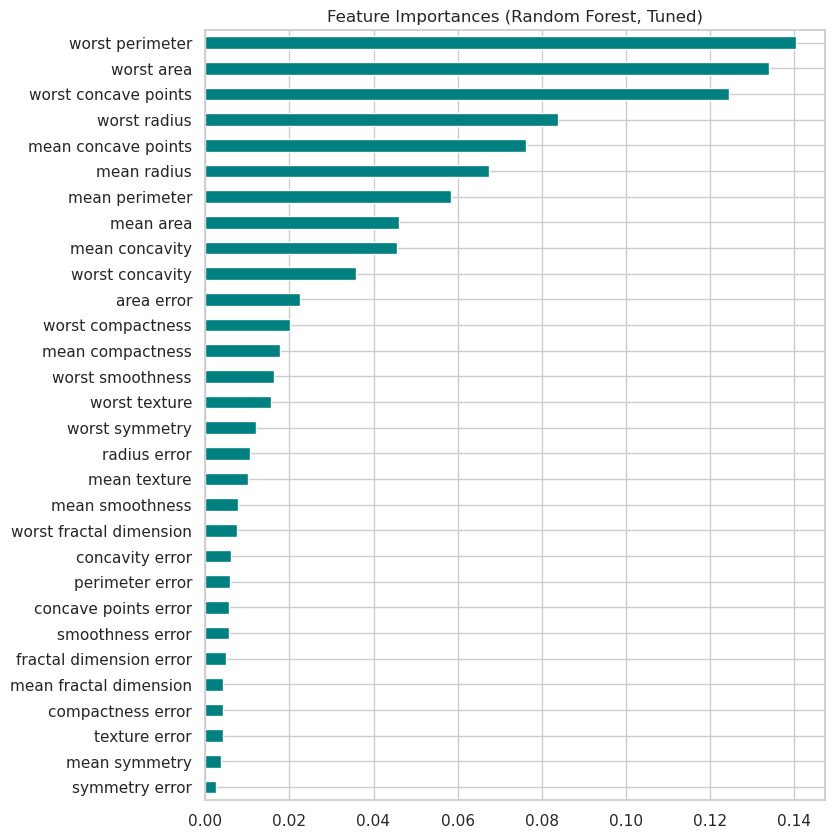

/tmp/ipykernel_10789/147577327.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


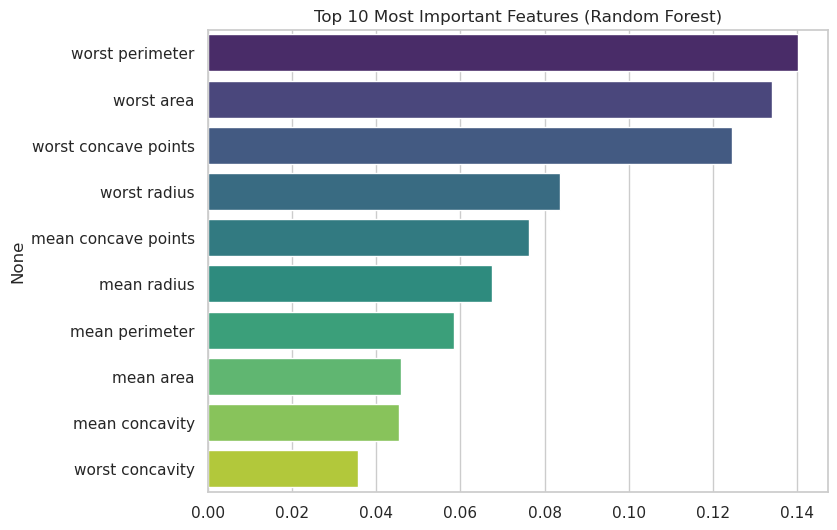

In [9]:

importances = pd.Series(rf_tuned.feature_importances_, index=cancer.feature_names)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8,10))
importances.plot(kind="barh", color="teal")
plt.title("Feature Importances (Random Forest, Tuned)")
plt.show()

# Top 10
top_features = importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Most Important Features (Random Forest)")
plt.show()
